In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import descartes

In [4]:
df_locales = pd.read_csv("../Data/locales-bailables.csv", encoding='latin1')
#df_locales.loc[:4, ['X', 'Y','NOMBRE','CALLE','NUMERO']]

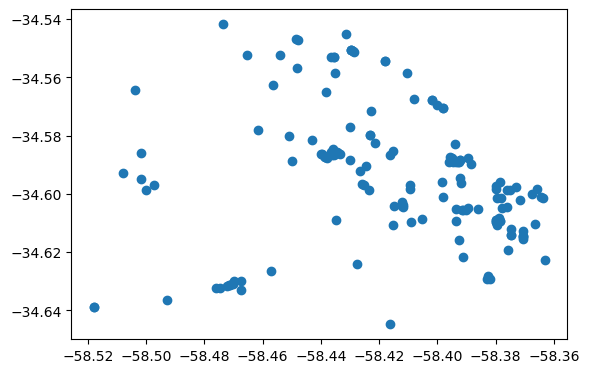

In [7]:
geo_locales = gpd.GeoDataFrame(df_locales
                             ,geometry=gpd.points_from_xy(df_locales.X, df_locales.Y))


geo_locales.plot()